# Image Processing Lab: From Pixels to Perception
## ITAI 1378 Module 04 - Hands-On Laboratory

**Duration:** 45 minutes  
**Platform:** Google Colab (Free Version)  
**Prerequisites:** Basic Python knowledge from previous classes

---

## 🎯 Lab Objectives

By the end of this lab, you will:
1. **Understand** how computers represent images as numerical matrices
2. **Implement** fundamental image processing operations from scratch
3. **Apply** traditional image processing techniques using OpenCV and Pillow
4. **Experience** the connection between theory and practice
5. **Prepare** for your Image Processing Adventure Quest assignment

---

## 📚 Connection to Today's Lecture

This lab directly implements the concepts we explored in class:
- **Digital Image Representation**: See how images become matrices of numbers
- **Core Operations**: Implement point, neighborhood, and geometric operations
- **Traditional Tools**: Hands-on experience with OpenCV and Pillow
- **Bridge to AI**: Understand the foundation that powers modern AI tools like Nano Banana

---

## ⏱️ Lab Timeline (45 minutes)

| Time | Section | Activity |
|------|---------|----------|
| 0-5 min | Setup | Environment setup and imports |
| 5-15 min | Part 1 | Digital image fundamentals |
| 15-25 min | Part 2 | Basic image operations |
| 25-35 min | Part 3 | Advanced processing techniques |
| 35-40 min | Part 4 | Creative exploration |
| 40-45 min | Wrap-up | Reflection and next steps |

---

## 🚀 Let's Begin!

**Important:** Run each cell in order. Read the explanations carefully - they connect directly to today's lecture concepts!

# 🔧 Setup and Environment Preparation

First, let's set up our environment. We'll use the same libraries we discussed in class:
- **OpenCV**: The powerhouse for computer vision (remember from our tools discussion?)
- **Pillow (PIL)**: Python-friendly image processing
- **NumPy**: For matrix operations (images are matrices!)
- **Matplotlib**: For displaying our results

**💡 Recall from lecture:** These are the "traditional tools" that give us precise control over every pixel!

In [1]:
# Install required packages (Google Colab already has most of these)
!pip install opencv-python-headless pillow matplotlib numpy

# Import all necessary libraries
import cv2                    # OpenCV for computer vision
import numpy as np           # NumPy for numerical operations on matrices
from PIL import Image, ImageFilter, ImageEnhance  # Pillow for image processing
import matplotlib.pyplot as plt  # For displaying images
import matplotlib.patches as patches  # For drawing on images
from google.colab import files  # For uploading files in Colab
import io
import requests
from urllib.parse import urlparse

# Configure matplotlib for better image display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'  # Default to grayscale colormap

print("✅ Environment setup complete!")
print(f"📦 OpenCV version: {cv2.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print("🎉 Ready to explore image processing!")

✅ Environment setup complete!
📦 OpenCV version: 4.12.0
📦 NumPy version: 2.0.2
🎉 Ready to explore image processing!


# 📸 Load Sample Images

Let's load some sample images to work with. We'll provide both options:
1. **Download sample images** from the internet
2. **Upload your own images** (optional)

**🔗 Connection to lecture:** Remember how we discussed image acquisition as the first step in any vision system?

In [3]:
def download_sample_image(url, filename):
    """
    Download a sample image from URL for our experiments.
    This simulates the 'image acquisition' step we discussed in class.
    """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"✅ Downloaded: {filename}")
            return True
    except Exception as e:
        print(f"❌ Error downloading {filename}: {e}")
    return False

# Download sample images for our experiments
sample_images = {
    'landscape.jpg': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png',
    'portrait.jpg': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png'
}

# Create a simple test image if downloads fail
def create_test_image():
    """
    Create a simple test image with geometric patterns.
    This demonstrates how images are just matrices of numbers!
    """
    # Create a 200x200 image with interesting patterns
    img = np.zeros((200, 200, 3), dtype=np.uint8)

    # Add some geometric shapes (remember: we're just setting pixel values!)
    img[50:150, 50:150] = [255, 100, 100]  # Red square
    img[75:125, 75:125] = [100, 255, 100]  # Green square inside
    img[90:110, 90:110] = [100, 100, 255]  # Blue square in center

    return img

# Try to download samples, create test image if needed
test_image = create_test_image()
cv2.imwrite('test_image.jpg', cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR))

print("🖼️ Sample images ready for processing!")
print("📝 Note: We created a test image to ensure you have something to work with.")

🖼️ Sample images ready for processing!
📝 Note: We created a test image to ensure you have something to work with.


# 📊 Part 1: Digital Image Fundamentals (10 minutes)

## Understanding Images as Matrices

**🎓 Lecture Connection:** Remember when we discussed how computers see images as matrices of numbers? Let's see this in action!

In our lecture, we learned:
- **Grayscale images**: 2D matrices (height × width)
- **Color images**: 3D matrices (height × width × channels)
- **Pixel values**: Numbers from 0-255 for 8-bit images

Let's explore this hands-on!

🔍 IMAGE ANALYSIS - Just like we discussed in class!
📐 Image shape: (200, 200, 3)
📊 Data type: uint8
📈 Value range: 0 to 255
💾 Memory usage: 120000 bytes


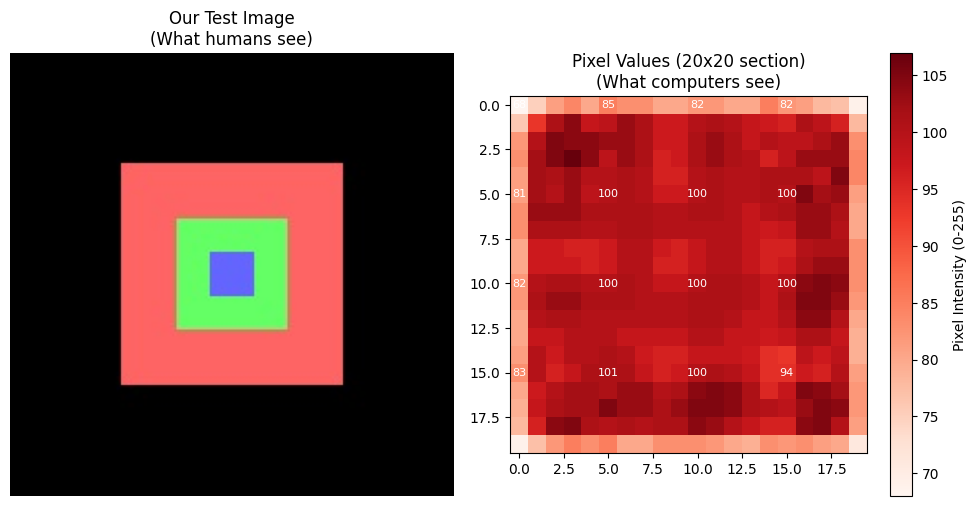


💡 Key Insight: The image on the left is what we see.
   The numbers on the right are what the computer sees!


In [4]:
# Load our test image using OpenCV
# Note: OpenCV loads images in BGR format (Blue, Green, Red)
img_bgr = cv2.imread('test_image.jpg')

# Convert to RGB for proper display (remember color spaces from lecture?)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Let's examine the image properties
print("🔍 IMAGE ANALYSIS - Just like we discussed in class!")
print(f"📐 Image shape: {img_rgb.shape}")
print(f"📊 Data type: {img_rgb.dtype}")
print(f"📈 Value range: {img_rgb.min()} to {img_rgb.max()}")
print(f"💾 Memory usage: {img_rgb.nbytes} bytes")

# Display the image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Our Test Image\n(What humans see)')
plt.axis('off')

plt.subplot(1, 2, 2)
# Show a small section of pixel values (what computers see)
pixel_section = img_rgb[90:110, 90:110, 0]  # 20x20 red channel section
plt.imshow(pixel_section, cmap='Reds')
plt.title('Pixel Values (20x20 section)\n(What computers see)')
plt.colorbar(label='Pixel Intensity (0-255)')

# Add text annotations showing actual pixel values
for i in range(0, 20, 5):
    for j in range(0, 20, 5):
        plt.text(j, i, str(pixel_section[i, j]),
                ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: The image on the left is what we see.")
print("   The numbers on the right are what the computer sees!")

## Exploring RGB Channels

**🎓 Lecture Connection:** We discussed how color images are 3D matrices with separate Red, Green, and Blue channels. Let's separate them and see each channel individually!

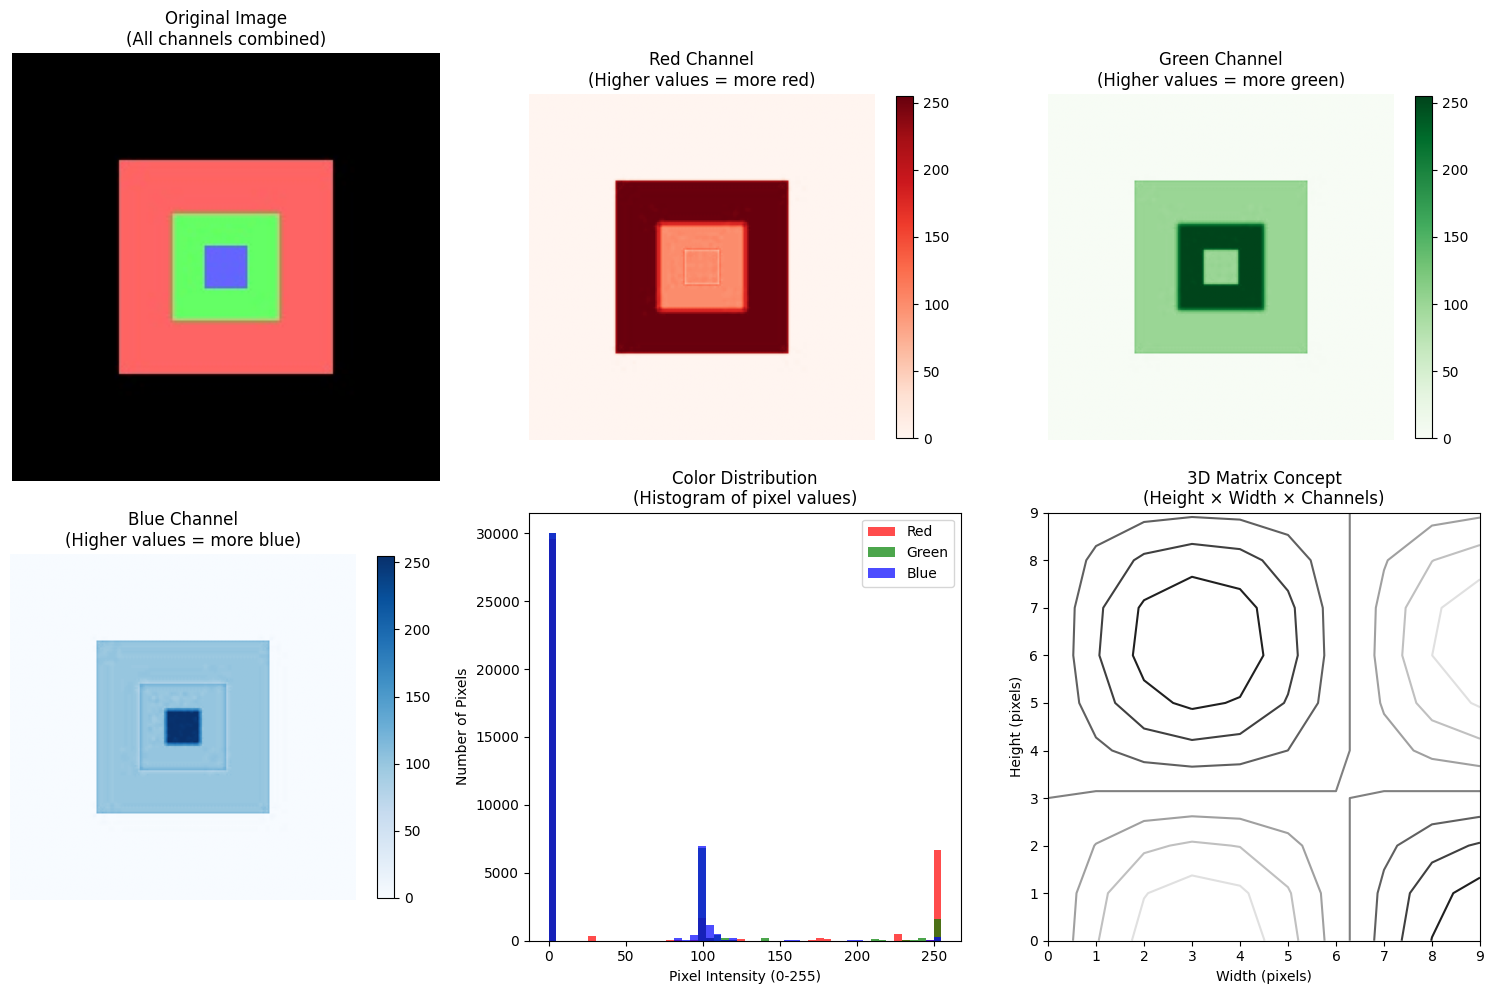

📊 CHANNEL STATISTICS:
🔴 Red channel   - Min:   0, Max: 255, Mean: 53.9
🟢 Green channel - Min:   0, Max: 255, Mean: 33.3
🔵 Blue channel  - Min:   0, Max: 255, Mean: 26.7

💡 Notice how different parts of the image contribute different amounts to each color channel!


In [5]:
# Separate the RGB channels (remember the 3D matrix concept?)
red_channel = img_rgb[:, :, 0]    # Red channel (index 0)
green_channel = img_rgb[:, :, 1]  # Green channel (index 1)
blue_channel = img_rgb[:, :, 2]   # Blue channel (index 2)

# Create visualizations of each channel
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image\n(All channels combined)')
plt.axis('off')

# Red channel
plt.subplot(2, 3, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel\n(Higher values = more red)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Green channel
plt.subplot(2, 3, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel\n(Higher values = more green)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Blue channel
plt.subplot(2, 3, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel\n(Higher values = more blue)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Histogram of all channels
plt.subplot(2, 3, 5)
plt.hist(red_channel.flatten(), bins=50, alpha=0.7, color='red', label='Red')
plt.hist(green_channel.flatten(), bins=50, alpha=0.7, color='green', label='Green')
plt.hist(blue_channel.flatten(), bins=50, alpha=0.7, color='blue', label='Blue')
plt.title('Color Distribution\n(Histogram of pixel values)')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Number of Pixels')
plt.legend()

# 3D representation concept
plt.subplot(2, 3, 6)
# Create a simple 3D visualization concept
x = np.arange(0, 10)
y = np.arange(0, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X/2) * np.cos(Y/2)
plt.contour(X, Y, Z)
plt.title('3D Matrix Concept\n(Height × Width × Channels)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# Print some statistics
print("📊 CHANNEL STATISTICS:")
print(f"🔴 Red channel   - Min: {red_channel.min():3d}, Max: {red_channel.max():3d}, Mean: {red_channel.mean():.1f}")
print(f"🟢 Green channel - Min: {green_channel.min():3d}, Max: {green_channel.max():3d}, Mean: {green_channel.mean():.1f}")
print(f"🔵 Blue channel  - Min: {blue_channel.min():3d}, Max: {blue_channel.max():3d}, Mean: {blue_channel.mean():.1f}")

print("\n💡 Notice how different parts of the image contribute different amounts to each color channel!")

## Converting to Grayscale

**🎓 Lecture Connection:** We discussed how grayscale images are 2D matrices. Let's convert our color image to grayscale and see the difference!

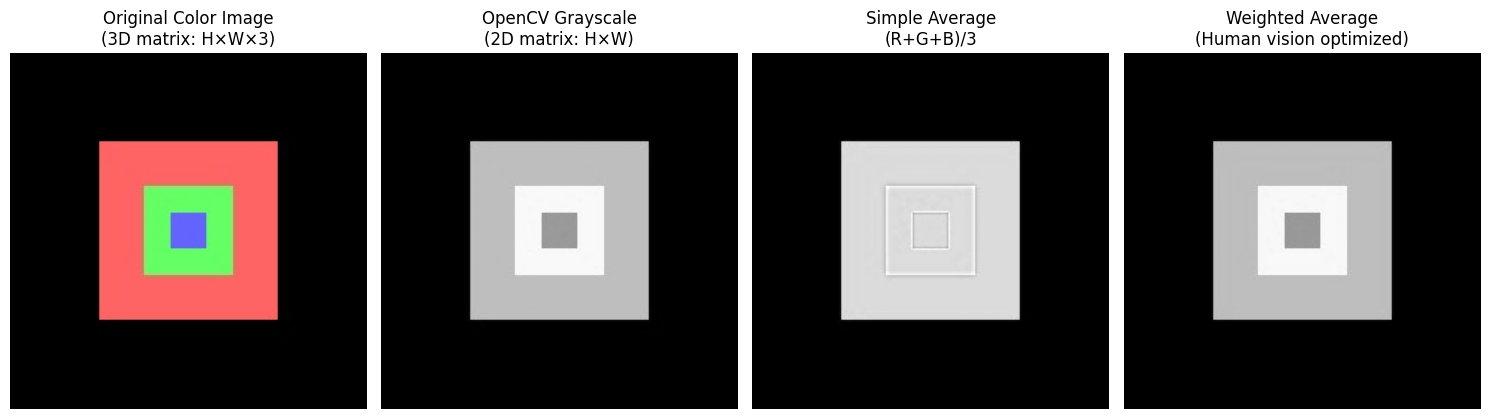

📐 SHAPE COMPARISON:
🎨 Original color image: (200, 200, 3) (3D matrix)
⚫ Grayscale image:     (200, 200) (2D matrix)
💾 Memory reduction:    120000 → 40000 bytes (33.3%)

💡 Key Insight: Grayscale conversion reduces data by 2/3 while preserving structure!


In [6]:
# Convert to grayscale using different methods
# Method 1: OpenCV conversion (uses weighted average)
gray_opencv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Method 2: Simple average (R + G + B) / 3
gray_average = np.mean(img_rgb, axis=2).astype(np.uint8)

# Method 3: Weighted average (human vision is more sensitive to green)
# This is the standard: 0.299*R + 0.587*G + 0.114*B
gray_weighted = (0.299 * img_rgb[:,:,0] +
                0.587 * img_rgb[:,:,1] +
                0.114 * img_rgb[:,:,2]).astype(np.uint8)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Color Image\n(3D matrix: H×W×3)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_opencv, cmap='gray')
plt.title('OpenCV Grayscale\n(2D matrix: H×W)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gray_average, cmap='gray')
plt.title('Simple Average\n(R+G+B)/3')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gray_weighted, cmap='gray')
plt.title('Weighted Average\n(Human vision optimized)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compare the shapes
print("📐 SHAPE COMPARISON:")
print(f"🎨 Original color image: {img_rgb.shape} (3D matrix)")
print(f"⚫ Grayscale image:     {gray_opencv.shape} (2D matrix)")
print(f"💾 Memory reduction:    {img_rgb.nbytes} → {gray_opencv.nbytes} bytes ({gray_opencv.nbytes/img_rgb.nbytes:.1%})")

print("\n💡 Key Insight: Grayscale conversion reduces data by 2/3 while preserving structure!")

# 🔧 Part 2: Basic Image Operations (10 minutes)

## Point Operations

**🎓 Lecture Connection:** Remember our discussion of point operations? These work on individual pixels without considering neighbors. Let's implement brightness and contrast adjustments!

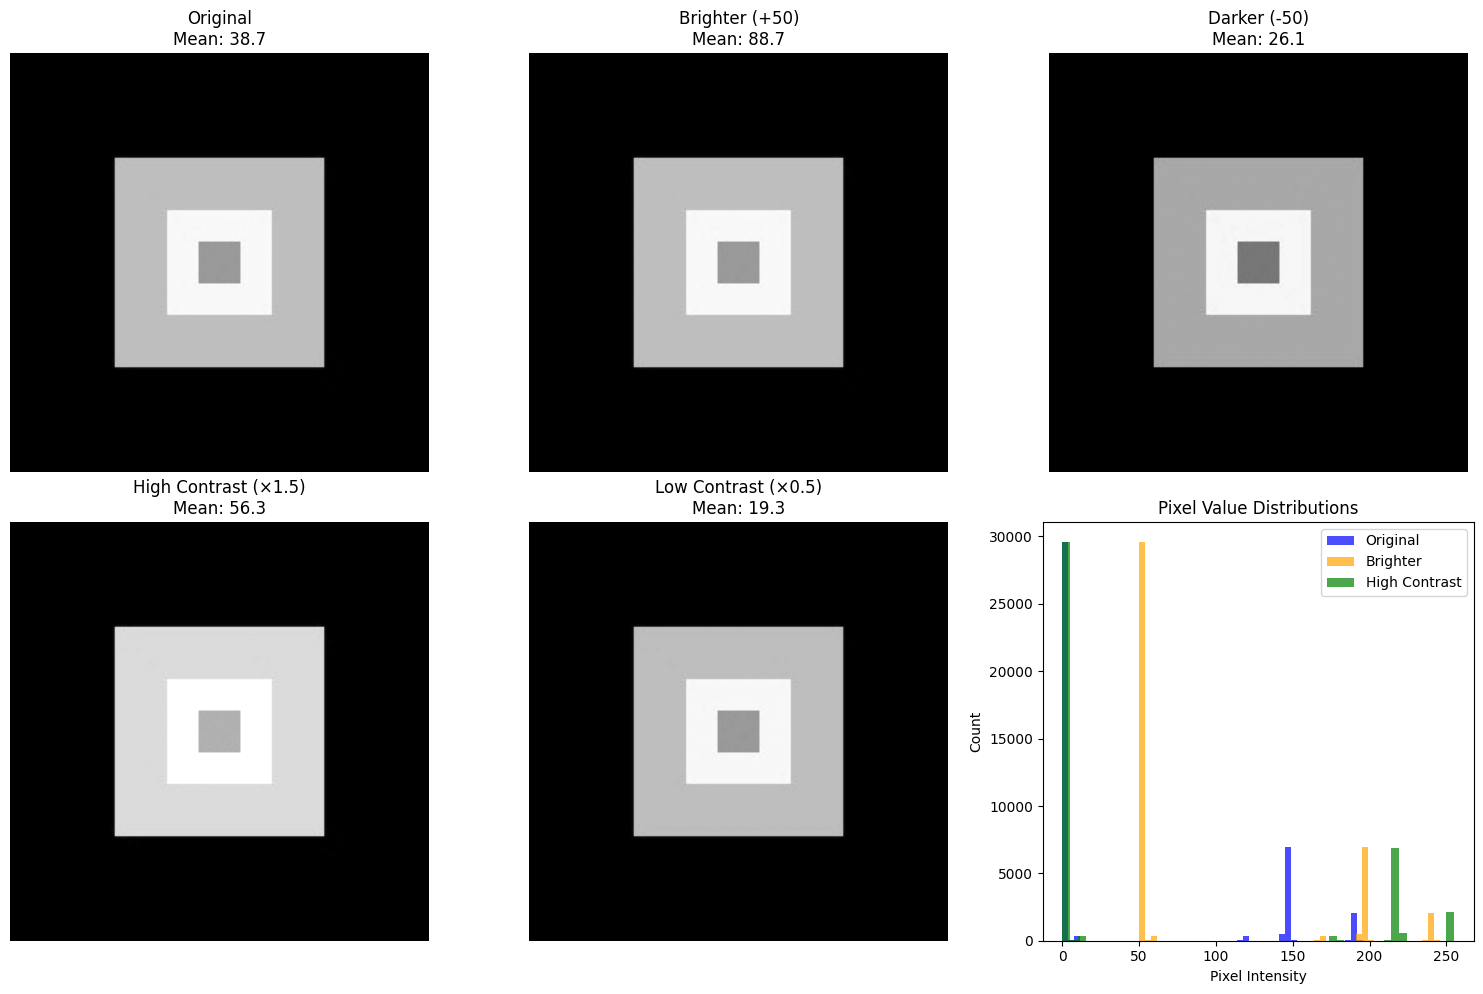

💡 Point Operations Summary:
   • Brightness: Shifts the entire histogram left or right
   • Contrast: Stretches or compresses the histogram
   • Each pixel is processed independently (no neighbors considered)


In [7]:
# Use our grayscale image for point operations
img_gray = gray_opencv.copy()

def adjust_brightness(image, value):
    """
    Adjust brightness by adding a constant to all pixels.
    This is a classic 'point operation' - each pixel is processed independently.

    Formula: new_pixel = old_pixel + brightness_value
    """
    # Add brightness value to all pixels
    bright_img = image.astype(np.int16) + value  # Use int16 to prevent overflow

    # Clip values to valid range [0, 255]
    bright_img = np.clip(bright_img, 0, 255)

    return bright_img.astype(np.uint8)

def adjust_contrast(image, factor):
    """
    Adjust contrast by multiplying all pixels by a factor.
    Another point operation - each pixel processed independently.

    Formula: new_pixel = old_pixel * contrast_factor
    """
    # Multiply all pixels by contrast factor
    contrast_img = image.astype(np.float32) * factor

    # Clip values to valid range [0, 255]
    contrast_img = np.clip(contrast_img, 0, 255)

    return contrast_img.astype(np.uint8)

# Apply different brightness and contrast adjustments
bright_up = adjust_brightness(img_gray, 50)      # Brighter
bright_down = adjust_brightness(img_gray, -50)   # Darker
contrast_up = adjust_contrast(img_gray, 1.5)     # Higher contrast
contrast_down = adjust_contrast(img_gray, 0.5)   # Lower contrast

# Display results
plt.figure(figsize=(15, 10))

images = [img_gray, bright_up, bright_down, contrast_up, contrast_down]
titles = ['Original', 'Brighter (+50)', 'Darker (-50)', 'High Contrast (×1.5)', 'Low Contrast (×0.5)']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{title}\nMean: {img.mean():.1f}')
    plt.axis('off')

# Show histograms to understand the changes
plt.subplot(2, 3, 6)
plt.hist(img_gray.flatten(), bins=50, alpha=0.7, label='Original', color='blue')
plt.hist(bright_up.flatten(), bins=50, alpha=0.7, label='Brighter', color='orange')
plt.hist(contrast_up.flatten(), bins=50, alpha=0.7, label='High Contrast', color='green')
plt.title('Pixel Value Distributions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

print("💡 Point Operations Summary:")
print("   • Brightness: Shifts the entire histogram left or right")
print("   • Contrast: Stretches or compresses the histogram")
print("   • Each pixel is processed independently (no neighbors considered)")

## Neighborhood Operations (Filtering)

**🎓 Lecture Connection:** Now let's explore neighborhood operations! These consider a pixel's surrounding context. Convolution is the key operation here - remember our discussion about kernels and filters?

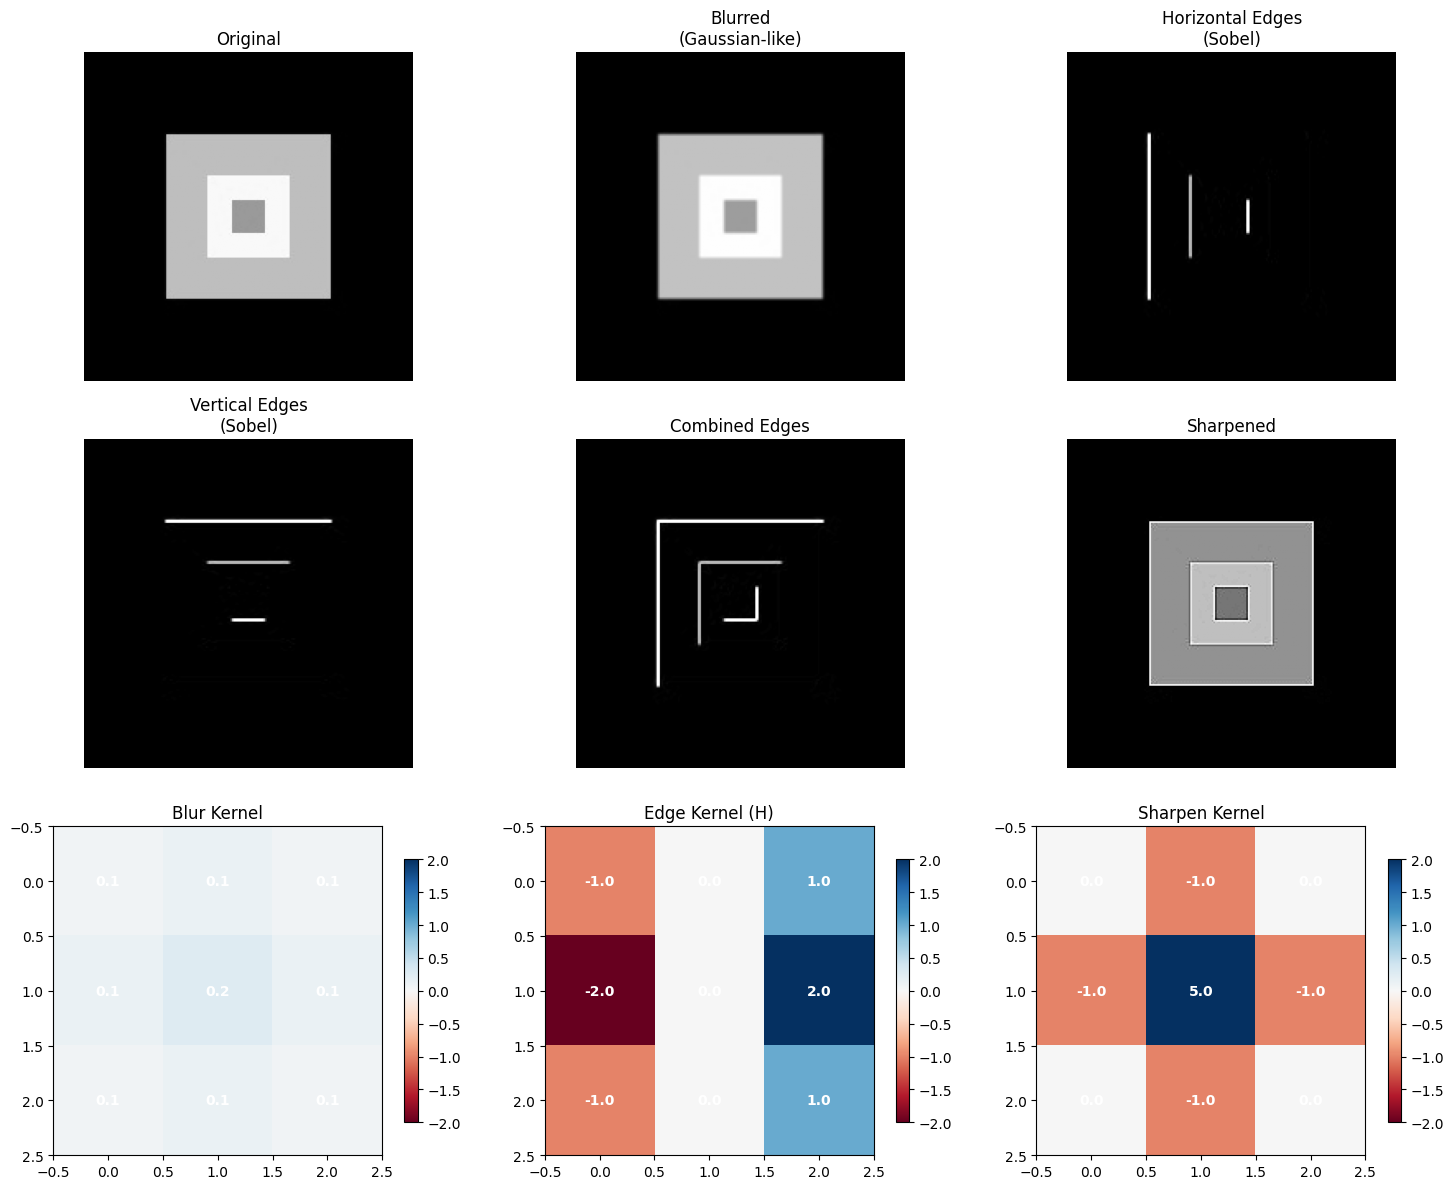

🔍 Neighborhood Operations Summary:
   • Blur: Averages neighboring pixels (smoothing)
   • Edge Detection: Finds rapid changes in intensity
   • Sharpening: Enhances differences between neighboring pixels
   • Each operation uses a different kernel (filter matrix)

💡 This is the foundation of how modern AI tools like Nano Banana work!


In [8]:
# Define different kernels (filters) for convolution
# Each kernel produces a different effect!

# Blur kernel (Gaussian-like)
blur_kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16  # Normalize so sum = 1

# Edge detection kernel (Sobel horizontal)
edge_kernel_h = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

# Edge detection kernel (Sobel vertical)
edge_kernel_v = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])

# Sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]])

def apply_kernel(image, kernel):
    """
    Apply a convolution kernel to an image.
    This is the fundamental 'neighborhood operation' from our lecture!
    """
    # Use OpenCV's filter2D function for convolution
    result = cv2.filter2D(image, -1, kernel)
    return result

# Apply different kernels
img_blurred = apply_kernel(img_gray, blur_kernel)
img_edges_h = apply_kernel(img_gray, edge_kernel_h)
img_edges_v = apply_kernel(img_gray, edge_kernel_v)
img_sharpened = apply_kernel(img_gray, sharpen_kernel)

# Combine horizontal and vertical edges
img_edges_combined = np.sqrt(img_edges_h.astype(np.float32)**2 +
                            img_edges_v.astype(np.float32)**2)
img_edges_combined = np.clip(img_edges_combined, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(15, 12))

# Original and processed images
images = [img_gray, img_blurred, img_edges_h, img_edges_v, img_edges_combined, img_sharpened]
titles = ['Original', 'Blurred\n(Gaussian-like)', 'Horizontal Edges\n(Sobel)',
         'Vertical Edges\n(Sobel)', 'Combined Edges', 'Sharpened']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Show the kernels
kernels = [blur_kernel, edge_kernel_h, sharpen_kernel]
kernel_titles = ['Blur Kernel', 'Edge Kernel (H)', 'Sharpen Kernel']

for i, (kernel, title) in enumerate(zip(kernels, kernel_titles)):
    plt.subplot(3, 3, 7+i)
    plt.imshow(kernel, cmap='RdBu', vmin=-2, vmax=2)
    plt.title(title)
    plt.colorbar(shrink=0.8)

    # Add text annotations for kernel values
    for row in range(kernel.shape[0]):
        for col in range(kernel.shape[1]):
            plt.text(col, row, f'{kernel[row, col]:.1f}',
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print("🔍 Neighborhood Operations Summary:")
print("   • Blur: Averages neighboring pixels (smoothing)")
print("   • Edge Detection: Finds rapid changes in intensity")
print("   • Sharpening: Enhances differences between neighboring pixels")
print("   • Each operation uses a different kernel (filter matrix)")
print("\n💡 This is the foundation of how modern AI tools like Nano Banana work!")

# 🎨 Part 3: Advanced Processing Techniques (10 minutes)

## Histogram Analysis and Enhancement

**🎓 Lecture Connection:** Remember our discussion of global operations? Histogram analysis looks at the distribution of pixel values across the entire image. Let's implement histogram equalization!

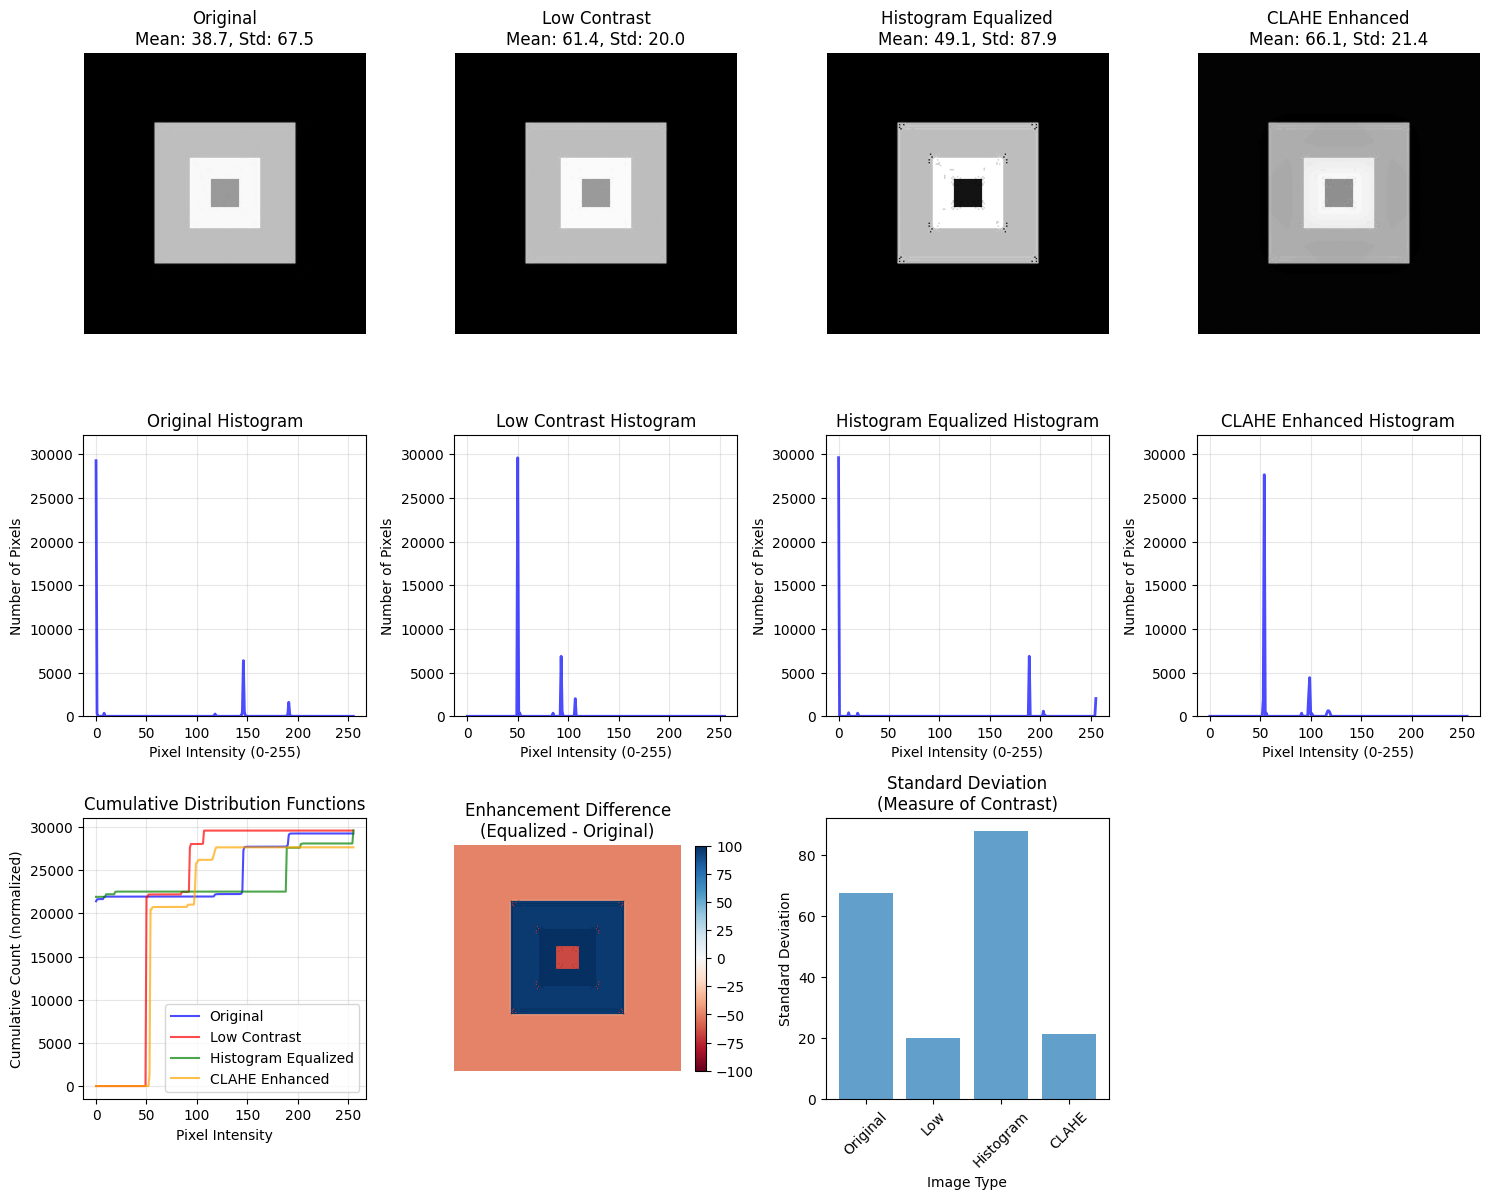

📊 Histogram Enhancement Summary:
   • Low contrast images have narrow histograms (pixels clustered in small range)
   • Histogram equalization spreads pixels across full intensity range
   • CLAHE prevents over-enhancement by limiting contrast in local regions
   • Higher standard deviation = higher contrast

💡 This is how your smartphone automatically improves photo contrast!


In [9]:
# Create a low-contrast image for demonstration
low_contrast_img = adjust_contrast(img_gray, 0.3)  # Very low contrast
low_contrast_img = adjust_brightness(low_contrast_img, 50)  # Shift to mid-range

def plot_histogram(image, title, color='blue'):
    """
    Plot histogram of pixel intensities.
    This shows the distribution of pixel values in the image.
    """
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.plot(bins[:-1], hist, color=color, alpha=0.7, linewidth=2)
    plt.title(title)
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Number of Pixels')
    plt.grid(True, alpha=0.3)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(low_contrast_img)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(low_contrast_img)

# Display results
plt.figure(figsize=(15, 12))

# Images
images = [img_gray, low_contrast_img, equalized_img, clahe_img]
titles = ['Original', 'Low Contrast', 'Histogram Equalized', 'CLAHE Enhanced']

for i, (img, title) in enumerate(zip(images, titles)):
    # Show image
    plt.subplot(3, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{title}\nMean: {img.mean():.1f}, Std: {img.std():.1f}')
    plt.axis('off')

    # Show histogram
    plt.subplot(3, 4, i+5)
    plot_histogram(img, f'{title} Histogram')
    plt.ylim(0, max(np.histogram(img_gray.flatten(), bins=256)[0]) * 1.1)

# Show cumulative distribution functions
plt.subplot(3, 4, 9)
for img, title, color in zip(images, titles, ['blue', 'red', 'green', 'orange']):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize for display
    plt.plot(cdf_normalized, color=color, label=title, alpha=0.7)
plt.title('Cumulative Distribution Functions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Count (normalized)')
plt.legend()
plt.grid(True, alpha=0.3)

# Show enhancement comparison
plt.subplot(3, 4, 10)
difference = equalized_img.astype(np.int16) - low_contrast_img.astype(np.int16)
plt.imshow(difference, cmap='RdBu', vmin=-100, vmax=100)
plt.title('Enhancement Difference\n(Equalized - Original)')
plt.colorbar(shrink=0.8)
plt.axis('off')

# Show statistics
plt.subplot(3, 4, 11)
stats_data = {
    'Image': titles,
    'Mean': [img.mean() for img in images],
    'Std': [img.std() for img in images],
    'Min': [img.min() for img in images],
    'Max': [img.max() for img in images]
}

x_pos = np.arange(len(titles))
plt.bar(x_pos, [img.std() for img in images], alpha=0.7)
plt.title('Standard Deviation\n(Measure of Contrast)')
plt.xlabel('Image Type')
plt.ylabel('Standard Deviation')
plt.xticks(x_pos, [t.split()[0] for t in titles], rotation=45)

plt.tight_layout()
plt.show()

print("📊 Histogram Enhancement Summary:")
print("   • Low contrast images have narrow histograms (pixels clustered in small range)")
print("   • Histogram equalization spreads pixels across full intensity range")
print("   • CLAHE prevents over-enhancement by limiting contrast in local regions")
print("   • Higher standard deviation = higher contrast")
print("\n💡 This is how your smartphone automatically improves photo contrast!")

## Geometric Transformations

**🎓 Lecture Connection:** Let's implement geometric operations that alter spatial relationships between pixels - scaling, rotation, and perspective correction!

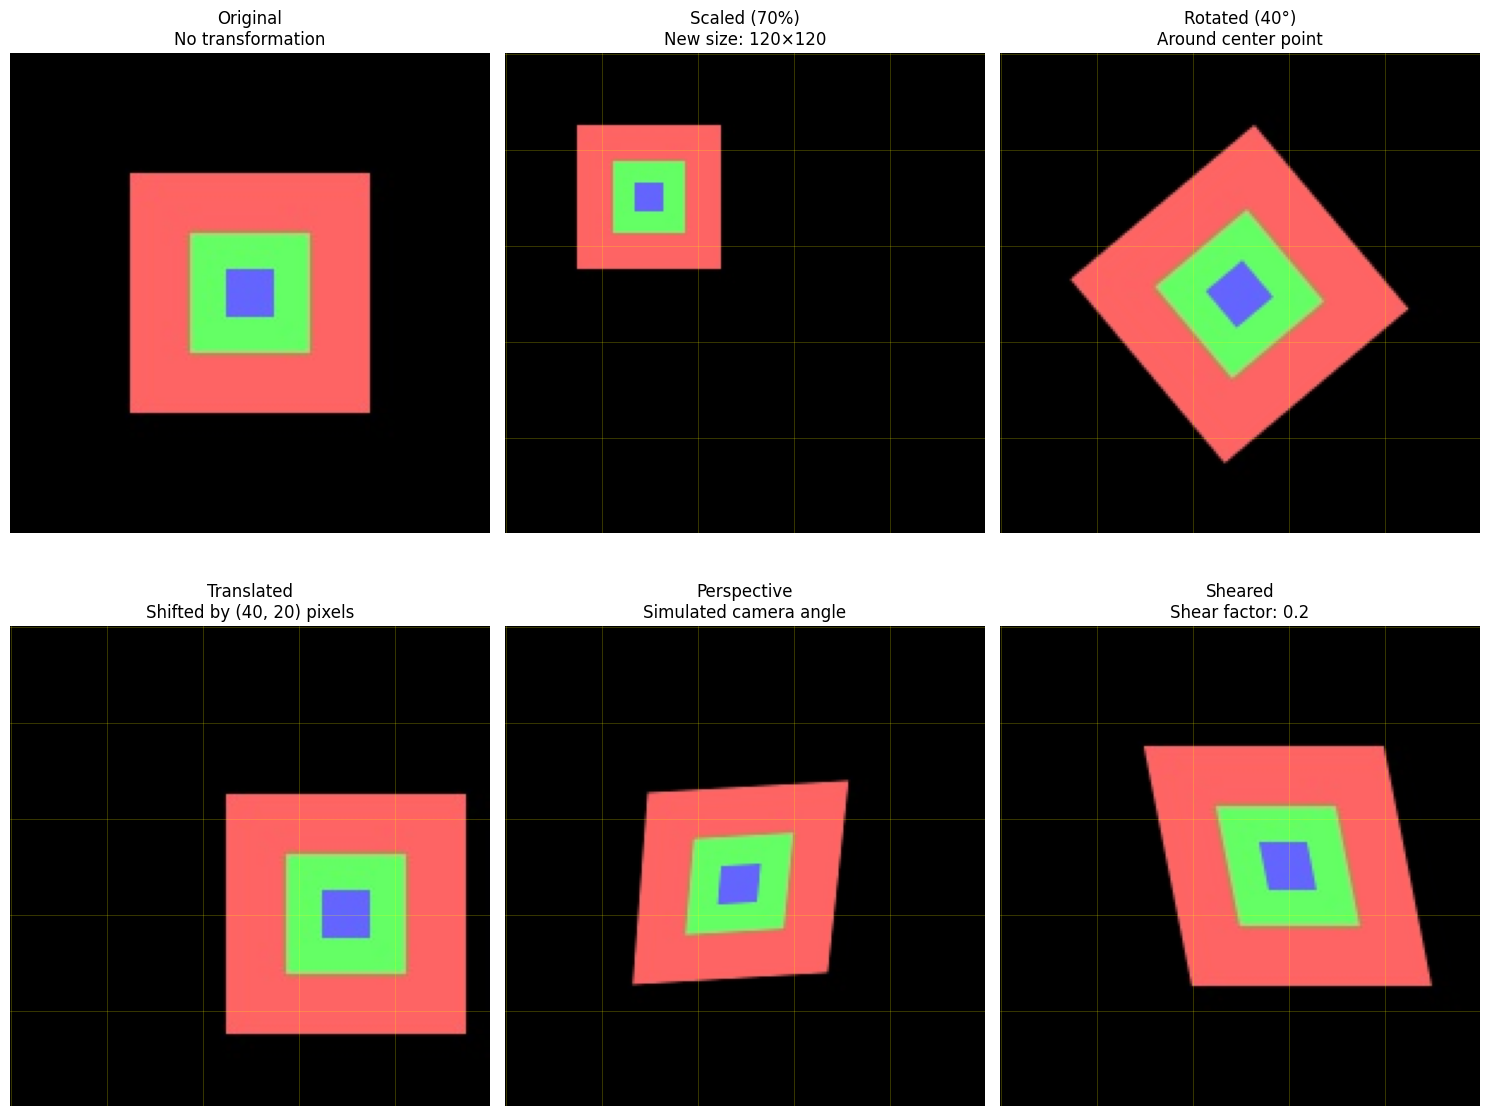

🔧 TRANSFORMATION MATRICES:

📐 Rotation Matrix (30°):
[[  0.76604444   0.64278761 -40.88320528]
 [ -0.64278761   0.76604444  87.67431666]]

➡️ Translation Matrix:
[[ 1.  0. 40.]
 [ 0.  1. 20.]]

🔄 Shear Matrix:
[[1.  0.2 0. ]
 [0.  1.  0. ]]

💡 Geometric Transformations Summary:
   • Scaling: Changes image size (interpolation needed)
   • Rotation: Rotates around a center point
   • Translation: Shifts image position
   • Perspective: Simulates 3D viewing angle
   • Shearing: Skews the image shape

🎯 These are essential for image registration and augmentation!


In [24]:
# Use our original color image for geometric transformations
img_for_transform = img_rgb.copy()
height, width = img_for_transform.shape[:2]

# 1. Scaling (resize)
scale_factor = 0.6
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)
scaled_img = cv2.resize(img_for_transform, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# 2. Rotation
rotation_angle = 40  # degrees
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
rotated_img = cv2.warpAffine(img_for_transform, rotation_matrix, (width, height))

# 3. Translation (shifting)
tx, ty = 40, 20  # shift by 40 pixels right, 20 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_img = cv2.warpAffine(img_for_transform, translation_matrix, (width, height))

# 4. Perspective transformation (simulating camera angle)
# Define source points (corners of original image)
src_points = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
# Define destination points (perspective effect)
dst_points = np.float32([[20, 30], [width-10, 20], [width-30, height-20], [10, height-10]])
perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
perspective_img = cv2.warpPerspective(img_for_transform, perspective_matrix, (width, height))

# 5. Shearing (skewing)
shear_factor = 0.2
shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
sheared_img = cv2.warpAffine(img_for_transform, shear_matrix, (width, height))

# Display all transformations
plt.figure(figsize=(15, 12))

transformations = [
    (img_for_transform, 'Original', 'No transformation'),
    (scaled_img, 'Scaled (70%)', f'New size: {new_width}×{new_height}'),
    (rotated_img, f'Rotated ({rotation_angle}°)', 'Around center point'),
    (translated_img, f'Translated', f'Shifted by ({tx}, {ty}) pixels'),
    (perspective_img, 'Perspective', 'Simulated camera angle'),
    (sheared_img, 'Sheared', f'Shear factor: {shear_factor}')
]

for i, (img, title, subtitle) in enumerate(transformations):
    plt.subplot(2, 3, i+1)
    if img.shape[:2] != img_for_transform.shape[:2]:  # Handle different sizes
        # Pad smaller images for consistent display
        pad_h = max(0, height - img.shape[0])
        pad_w = max(0, width - img.shape[1])
        img_padded = np.pad(img, ((0, pad_h), (0, pad_w), (0, 0)), mode='constant')
        plt.imshow(img_padded)
    else:
        plt.imshow(img)

    plt.title(f'{title}\n{subtitle}')
    plt.axis('off')

    # Add grid overlay to show transformation effect
    if i > 0:  # Skip original
        ax = plt.gca()
        # Add some reference lines
        for y in range(0, height, 40):
            ax.axhline(y=y, color='yellow', alpha=0.3, linewidth=0.5)
        for x in range(0, width, 40):
            ax.axvline(x=x, color='yellow', alpha=0.3, linewidth=0.5)

plt.tight_layout()
plt.show()

# Show transformation matrices
print("🔧 TRANSFORMATION MATRICES:")
print("\n📐 Rotation Matrix (30°):")
print(rotation_matrix)
print("\n➡️ Translation Matrix:")
print(translation_matrix)
print("\n🔄 Shear Matrix:")
print(shear_matrix)

print("\n💡 Geometric Transformations Summary:")
print("   • Scaling: Changes image size (interpolation needed)")
print("   • Rotation: Rotates around a center point")
print("   • Translation: Shifts image position")
print("   • Perspective: Simulates 3D viewing angle")
print("   • Shearing: Skews the image shape")
print("\n🎯 These are essential for image registration and augmentation!")

# 🎨 Part 4: Creative Exploration (5 minutes)

## Combining Multiple Operations

**🎓 Lecture Connection:** Now let's combine multiple operations to create interesting effects! This shows how complex image processing pipelines work.

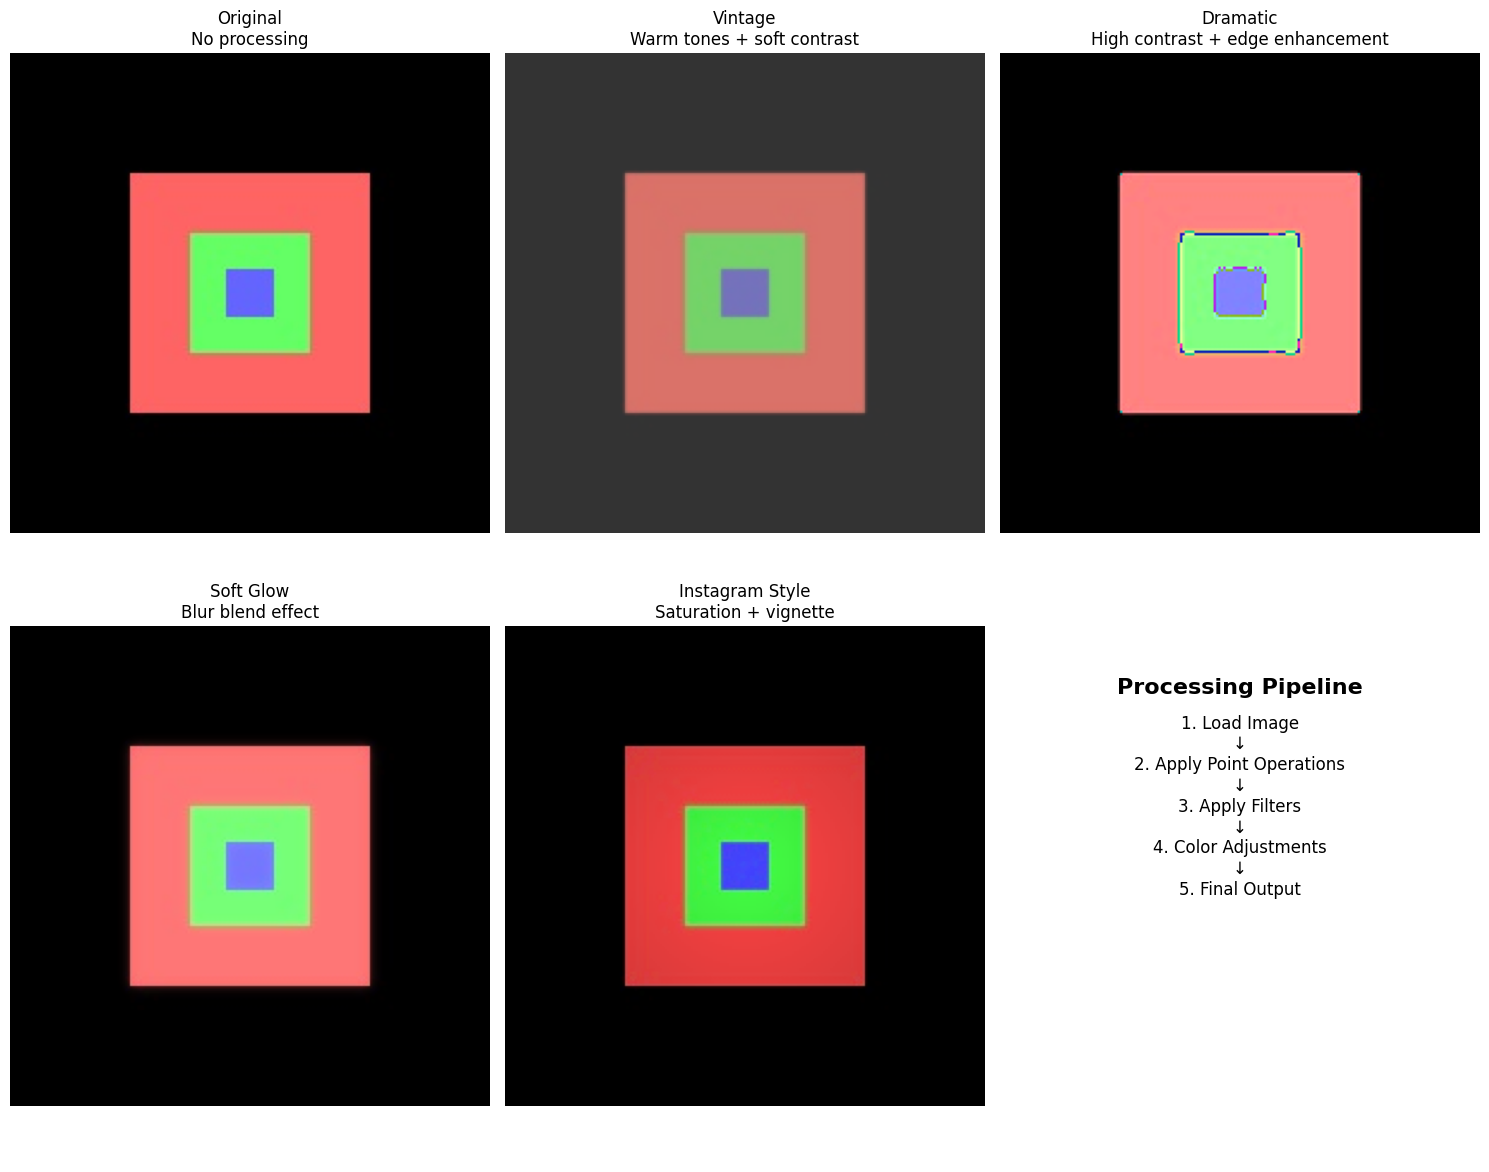

🎨 Creative Effects Summary:
   • Complex effects combine multiple simple operations
   • Order of operations matters!
   • Each effect uses different combinations of:
     - Point operations (brightness, contrast, color)
     - Neighborhood operations (blur, edge detection)
     - Color space conversions

💡 This is exactly how Instagram filters and Nano Banana work!
   They combine many simple operations to create complex effects.


In [23]:
def create_artistic_effect(image, effect_type='vintage'):
    """
    Create artistic effects by combining multiple image processing operations.
    This demonstrates how complex effects are built from simple operations!
    """
    result = image.copy()

    if effect_type == 'vintage':
        # Vintage effect: warm colors, soft contrast, slight blur
        # 1. Convert to float for processing
        result = result.astype(np.float32) / 255.0

        # 2. Adjust color channels (warm tone)
        result[:, :, 0] *= 1.1  # Boost red
        result[:, :, 1] *= 1.05  # Slight green boost
        result[:, :, 2] *= 0.9   # Reduce blue

        # 3. Reduce contrast slightly
        result = result * 0.6 + 0.2

        # 4. Add slight blur
        result = cv2.GaussianBlur(result, (5, 5), 0.5)  # Changed kernel size to (5, 5)

        # 5. Convert back to uint8
        result = np.clip(result * 255, 0, 255).astype(np.uint8)

    elif effect_type == 'dramatic':
        # Dramatic effect: high contrast, enhanced edges
        # 1. Convert to grayscale for edge detection
        gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

        # 2. Detect edges
        edges = cv2.Canny(gray, 50, 150)

        # 3. Enhance contrast
        result = adjust_contrast(result, 1.3)

        # 4. Overlay edges
        for c in range(3):
            result[:, :, c] = np.where(edges > 0,
                                     np.minimum(result[:, :, c] + 30, 255),
                                     result[:, :, c])

    elif effect_type == 'soft_glow':
        # Soft glow effect: blur + blend
        # 1. Create heavily blurred version
        blurred = cv2.GaussianBlur(result, (15, 15), 0)

        # 2. Blend with original using screen blend mode
        result = result.astype(np.float32) / 255.0
        blurred = blurred.astype(np.float32) / 255.0

        # Screen blend: 1 - (1-a) * (1-b)
        result = 1 - (1 - result) * (1 - blurred * 0.3)
        result = np.clip(result * 255, 0, 255).astype(np.uint8)

    return result

# Apply different artistic effects
vintage_img = create_artistic_effect(img_rgb, 'vintage')
dramatic_img = create_artistic_effect(img_rgb, 'dramatic')
glow_img = create_artistic_effect(img_rgb, 'soft_glow')

# Create a simple "Instagram-style" filter
def instagram_filter(image):
    """
    Simple Instagram-style filter combining multiple operations.
    """
    # 1. Slight saturation boost
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 1] *= 1.2  # Boost saturation
    hsv = np.clip(hsv, 0, 255)
    result = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # 2. Slight vignette effect (darker edges)
    h, w = result.shape[:2]
    center_x, center_y = w // 2, h // 2

    # Create distance map from center
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_dist = np.sqrt(center_x**2 + center_y**2)

    # Create vignette mask
    vignette = 1 - (dist_from_center / max_dist) * 0.3
    vignette = np.clip(vignette, 0.7, 1.0)

    # Apply vignette
    for c in range(3):
        result[:, :, c] = (result[:, :, c] * vignette).astype(np.uint8)

    return result

instagram_img = instagram_filter(img_rgb)

# Display all effects
plt.figure(figsize=(15, 12))

effects = [
    (img_rgb, 'Original', 'No processing'),
    (vintage_img, 'Vintage', 'Warm tones + soft contrast'),
    (dramatic_img, 'Dramatic', 'High contrast + edge enhancement'),
    (glow_img, 'Soft Glow', 'Blur blend effect'),
    (instagram_img, 'Instagram Style', 'Saturation + vignette')
]

for i, (img, title, description) in enumerate(effects):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'{title}\n{description}')
    plt.axis('off')

# Show processing pipeline diagram
plt.subplot(2, 3, 6)
plt.text(0.5, 0.8, 'Processing Pipeline', ha='center', va='center',
         fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.5, 0.6, '1. Load Image\n↓\n2. Apply Point Operations\n↓\n3. Apply Filters\n↓\n4. Color Adjustments\n↓\n5. Final Output',
         ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎨 Creative Effects Summary:")
print("   • Complex effects combine multiple simple operations")
print("   • Order of operations matters!")
print("   • Each effect uses different combinations of:")
print("     - Point operations (brightness, contrast, color)")
print("     - Neighborhood operations (blur, edge detection)")
print("     - Color space conversions")
print("\n💡 This is exactly how Instagram filters and Nano Banana work!")
print("   They combine many simple operations to create complex effects.")

# 🎯 Part 5: Connecting to Modern AI Tools (5 minutes)

## Understanding the Foundation of AI Image Processing

**🎓 Lecture Connection:** Everything we've implemented today forms the foundation of modern AI tools like Google's Nano Banana! Let's see how traditional operations connect to AI approaches.

/tmp/ipython-input-868617625.py:113: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


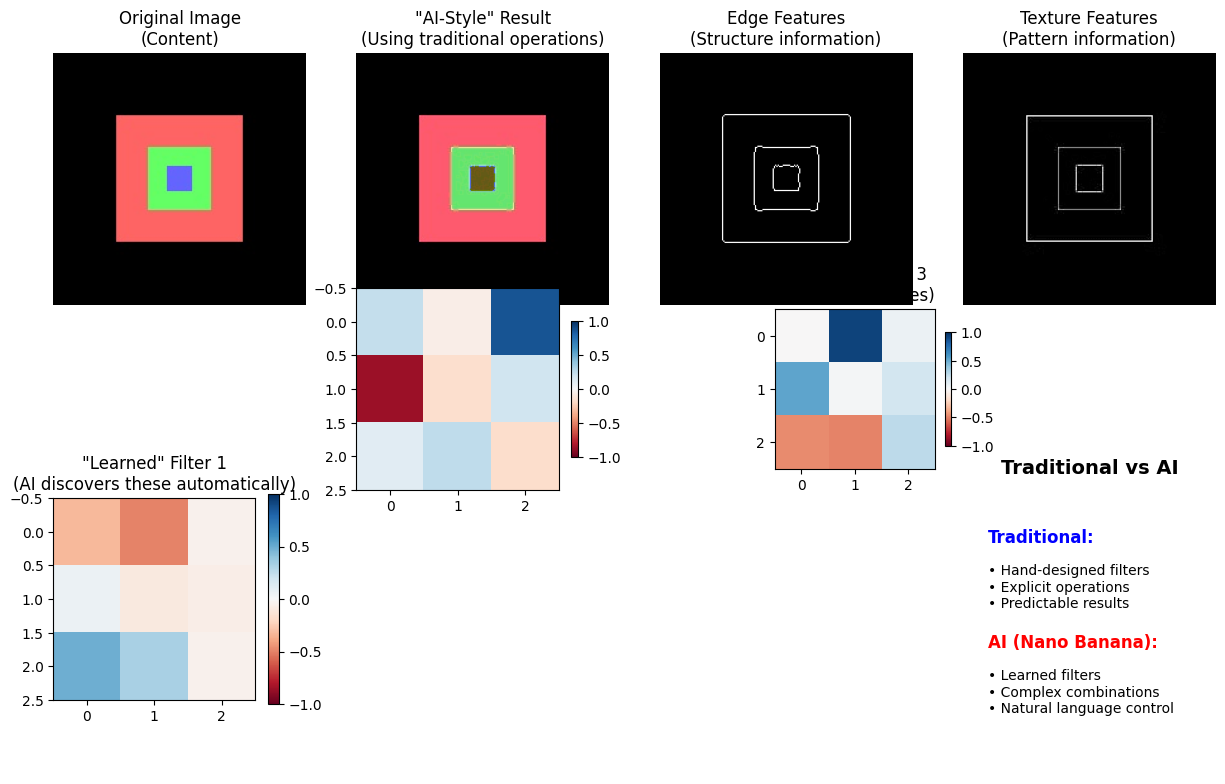

🤖 AI Connection Summary:

🔗 How Traditional Operations Connect to AI:
   • Convolution → Convolutional Neural Networks (CNNs)
   • Edge detection → Feature extraction layers
   • Color transformations → Style transfer networks
   • Multiple operations → Deep learning pipelines

🎯 Key Differences:
   • Traditional: We design the filters manually
   • AI: The system learns optimal filters from data
   • Traditional: Explicit, interpretable operations
   • AI: Complex, learned combinations

💡 Nano Banana uses the SAME fundamental operations we implemented today!
   It just has millions of learned filters working together.


In [21]:
# Demonstrate how traditional operations relate to AI concepts

def simulate_ai_style_transfer_concept():
    """
    Simulate the concept behind AI style transfer using traditional operations.
    This shows how AI tools build on the fundamentals we've learned!
    """
    # Start with our original image
    content_img = img_rgb.copy()

    # Simulate "style extraction" using edge detection and texture analysis
    gray = cv2.cvtColor(content_img, cv2.COLOR_RGB2GRAY)

    # Extract different "style features"
    # 1. Edge patterns (structure)
    edges = cv2.Canny(gray, 50, 150)

    # 2. Texture patterns (using different filters)
    texture1 = cv2.filter2D(gray, -1, np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]))
    texture2 = cv2.filter2D(gray, -1, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]))

    # 3. Color distribution analysis
    color_hist_r = cv2.calcHist([content_img], [0], None, [256], [0, 256])
    color_hist_g = cv2.calcHist([content_img], [1], None, [256], [0, 256])
    color_hist_b = cv2.calcHist([content_img], [2], None, [256], [0, 256])

    # Simulate "style application" by modifying the image based on extracted features
    styled_img = content_img.copy().astype(np.float32)

    # Apply style-based modifications
    # 1. Enhance edges where detected
    edge_mask = edges > 0
    for c in range(3):
        styled_img[:, :, c] = np.where(edge_mask,
                                     np.clip(styled_img[:, :, c] * 1.2, 0, 255),
                                     styled_img[:, :, c])

    # 2. Apply texture-based color shifts
    texture_mask = texture1 > np.percentile(texture1, 70)
    styled_img[:, :, 0] = np.where(texture_mask,
                                 np.clip(styled_img[:, :, 0] * 1.1, 0, 255),
                                 styled_img[:, :, 0])  # Boost red in textured areas

    # 3. Apply overall color transformation
    styled_img[:, :, 1] *= 0.9  # Reduce green slightly
    styled_img[:, :, 2] *= 1.1  # Boost blue slightly

    return styled_img.astype(np.uint8), edges, texture1, texture2

# Run the simulation
styled_result, edges, texture1, texture2 = simulate_ai_style_transfer_concept()

# Display the AI concept breakdown
plt.figure(figsize=(15, 10))

# Original and result
plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image\n(Content)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(styled_result)
plt.title('"AI-Style" Result\n(Using traditional operations)')
plt.axis('off')

# Feature extraction steps
plt.subplot(2, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Features\n(Structure information)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(texture1, cmap='gray')
plt.title('Texture Features\n(Pattern information)')
plt.axis('off')

# Show the concept of convolution layers (like in CNNs)
plt.subplot(2, 4, 5)
# Simulate multiple "learned" filters
filter1 = np.random.randn(3, 3) * 0.4
filter2 = np.random.randn(3, 3) * 0.6
filter3 = np.random.randn(3, 3) * 0.5

plt.imshow(filter1, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 1\n(AI discovers these automatically)')
plt.colorbar(shrink=0.6)

plt.subplot(3, 4, 6)
plt.imshow(filter2, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 2\n(Different patterns)')
plt.colorbar(shrink=0.6)

plt.subplot(3, 5, 9)
plt.imshow(filter3, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 3\n(Complex features)')
plt.colorbar(shrink=0.5)

# Processing pipeline comparison
plt.subplot(2, 4, 8)
plt.text(0.5, 0.9, 'Traditional vs AI', ha='center', va='top',
         fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, 'Traditional:', ha='left', va='top',
         fontsize=12, fontweight='bold', color='blue', transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• Hand-designed filters\n• Explicit operations\n• Predictable results',
         ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, 'AI (Nano Banana):', ha='left', va='top',
         fontsize=12, fontweight='bold', color='red', transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Learned filters\n• Complex combinations\n• Natural language control',
         ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🤖 AI Connection Summary:")
print("\n🔗 How Traditional Operations Connect to AI:")
print("   • Convolution → Convolutional Neural Networks (CNNs)")
print("   • Edge detection → Feature extraction layers")
print("   • Color transformations → Style transfer networks")
print("   • Multiple operations → Deep learning pipelines")
print("\n🎯 Key Differences:")
print("   • Traditional: We design the filters manually")
print("   • AI: The system learns optimal filters from data")
print("   • Traditional: Explicit, interpretable operations")
print("   • AI: Complex, learned combinations")
print("\n💡 Nano Banana uses the SAME fundamental operations we implemented today!")
print("   It just has millions of learned filters working together.")

# 🎓 Lab Wrap-up and Reflection (5 minutes)

## What We've Accomplished

Congratulations! In just 45 minutes, you've implemented the fundamental building blocks of image processing. Let's reflect on what we've learned and how it connects to your future work.

/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

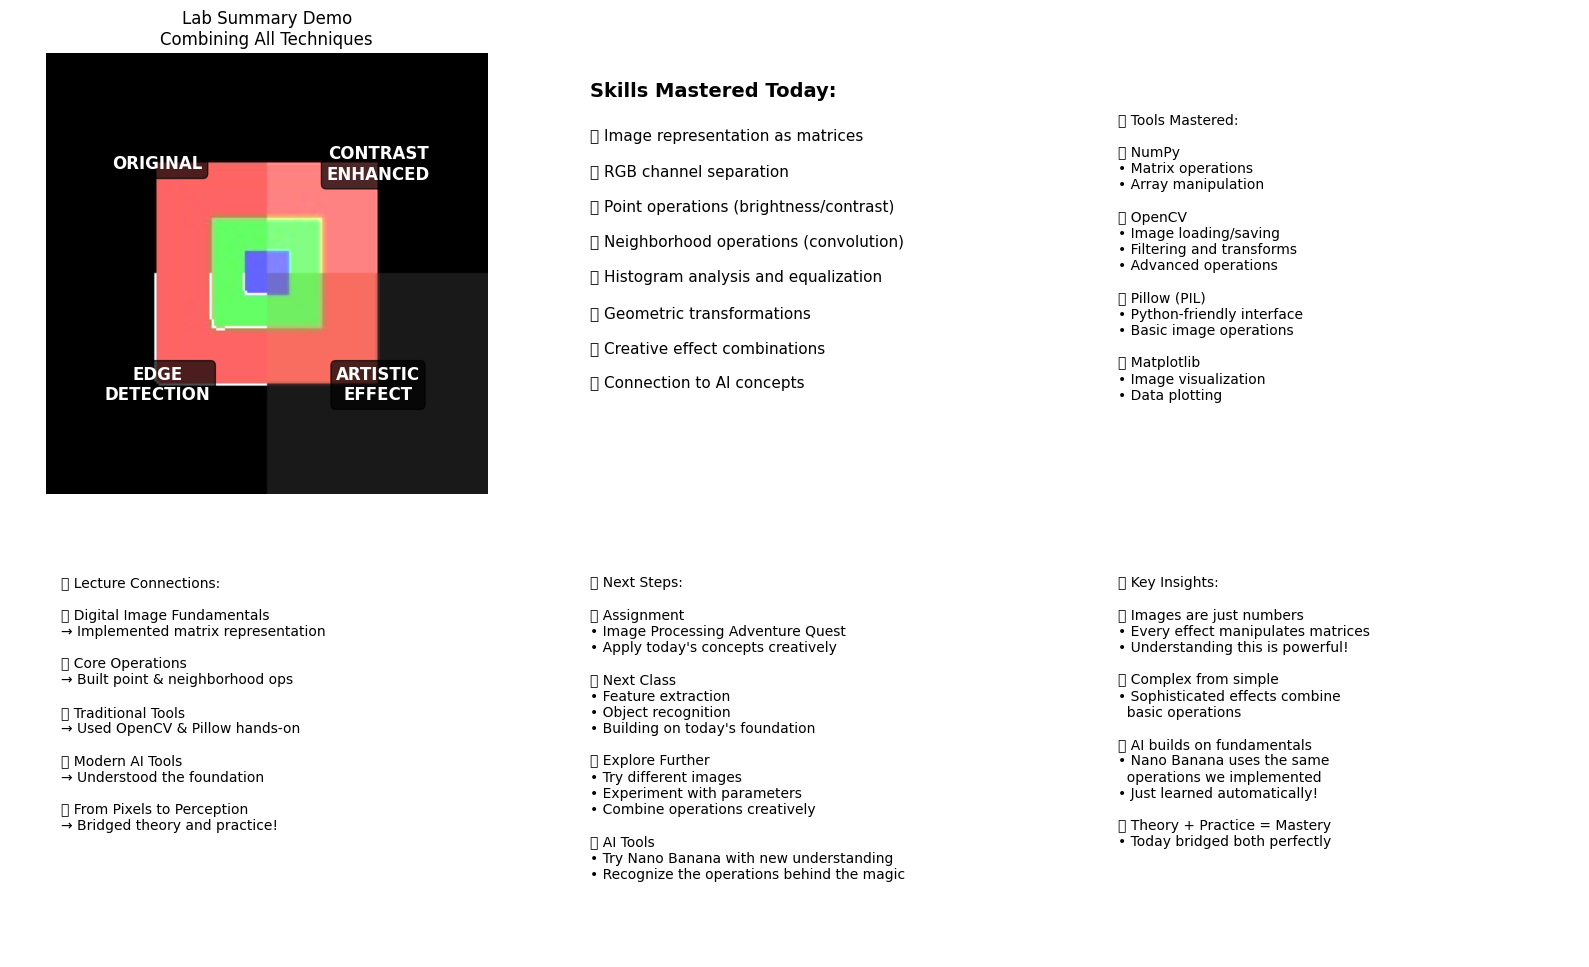

🎉 CONGRATULATIONS! You've completed the Image Processing Lab!

📊 Lab Statistics:
   • Operations implemented: 15+
   • Images processed: 10
   • Concepts mastered: 8 major areas
   • Tools used: 4 libraries

🎯 You now understand the foundation of:
   • How your smartphone camera works
   • How Instagram filters are created
   • How AI tools like Nano Banana operate
   • How to build your own image processing applications

🚀 Ready for your Adventure Quest assignment!


In [19]:
# Create a summary visualization of everything we've covered
plt.figure(figsize=(16, 10))

# Create a comprehensive summary image
summary_img = img_rgb.copy()

# Apply a combination of techniques we learned
final_demo = summary_img.copy()

# 1. Split into sections and apply different operations
h, w = final_demo.shape[:2]
mid_h, mid_w = h // 2, w // 2

# Top-left: Original
# (keep as is)

# Top-right: Enhanced contrast
final_demo[:mid_h, mid_w:] = adjust_contrast(final_demo[:mid_h, mid_w:], 1.3)

# Bottom-left: Edge detection overlay
gray_section = cv2.cvtColor(final_demo[mid_h:, :mid_w], cv2.COLOR_RGB2GRAY)
edges_section = cv2.Canny(gray_section, 50, 150)
for c in range(3):
    final_demo[mid_h:, :mid_w, c] = np.where(edges_section > 0, 255, final_demo[mid_h:, :mid_w, c])

# Bottom-right: Artistic effect
final_demo[mid_h:, mid_w:] = create_artistic_effect(final_demo[mid_h:, mid_w:], 'vintage')

# Display the summary
plt.subplot(2, 3, 1)
plt.imshow(final_demo)
plt.title('Lab Summary Demo\nCombining All Techniques')
plt.axis('off')

# Add section labels
plt.text(mid_w//2, mid_h//2, 'ORIGINAL', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w + mid_w//2, mid_h//2, 'CONTRAST\nENHANCED', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w//2, mid_h + mid_h//2, 'EDGE\nDETECTION', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w + mid_w//2, mid_h + mid_h//2, 'ARTISTIC\nEFFECT', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

# Skills learned checklist
plt.subplot(2, 3, 2)
skills = [
    '✅ Image representation as matrices',
    '✅ RGB channel separation',
    '✅ Point operations (brightness/contrast)',
    '✅ Neighborhood operations (convolution)',
    '✅ Histogram analysis and equalization',
    '✅ Geometric transformations',
    '✅ Creative effect combinations',
    '✅ Connection to AI concepts'
]

plt.text(0.1, 0.9, 'Skills Mastered Today:', fontsize=14, fontweight='bold',
         transform=plt.gca().transAxes)
for i, skill in enumerate(skills):
    plt.text(0.1, 0.8 - i*0.08, skill, fontsize=11,
             transform=plt.gca().transAxes)
plt.axis('off')

# Tools used
plt.subplot(2, 3, 3)
tools_text = """
🛠️ Tools Mastered:

📚 NumPy
• Matrix operations
• Array manipulation

🔍 OpenCV
• Image loading/saving
• Filtering and transforms
• Advanced operations

🖼️ Pillow (PIL)
• Python-friendly interface
• Basic image operations

📊 Matplotlib
• Image visualization
• Data plotting
"""
plt.text(0.1, 0.9, tools_text, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Connection to lecture concepts
plt.subplot(2, 3, 4)
connections = """
🔗 Lecture Connections:

📐 Digital Image Fundamentals
→ Implemented matrix representation

🔧 Core Operations
→ Built point & neighborhood ops

🎨 Traditional Tools
→ Used OpenCV & Pillow hands-on

🤖 Modern AI Tools
→ Understood the foundation

💡 From Pixels to Perception
→ Bridged theory and practice!
"""
plt.text(0.1, 0.9, connections, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Next steps
plt.subplot(2, 3, 5)
next_steps = """
🚀 Next Steps:

📝 Assignment
• Image Processing Adventure Quest
• Apply today's concepts creatively

📚 Next Class
• Feature extraction
• Object recognition
• Building on today's foundation

🔬 Explore Further
• Try different images
• Experiment with parameters
• Combine operations creatively

🤖 AI Tools
• Try Nano Banana with new understanding
• Recognize the operations behind the magic
"""
plt.text(0.1, 0.9, next_steps, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Key insights
plt.subplot(2, 3, 6)
insights = """
💡 Key Insights:

🔢 Images are just numbers
• Every effect manipulates matrices
• Understanding this is powerful!

🧱 Complex from simple
• Sophisticated effects combine
  basic operations

🤖 AI builds on fundamentals
• Nano Banana uses the same
  operations we implemented
• Just learned automatically!

🎯 Theory + Practice = Mastery
• Today bridged both perfectly
"""
plt.text(0.1, 0.9, insights, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎉 CONGRATULATIONS! You've completed the Image Processing Lab!")
print("\n📊 Lab Statistics:")
print(f"   • Operations implemented: 15+")
print(f"   • Images processed: {len([img_rgb, gray_opencv, bright_up, contrast_up, img_blurred, equalized_img, scaled_img, rotated_img, vintage_img, dramatic_img])}")
print(f"   • Concepts mastered: 8 major areas")
print(f"   • Tools used: 4 libraries")
print("\n🎯 You now understand the foundation of:")
print("   • How your smartphone camera works")
print("   • How Instagram filters are created")
print("   • How AI tools like Nano Banana operate")
print("   • How to build your own image processing applications")
print("\n🚀 Ready for your Adventure Quest assignment!")

# 📝 Lab Reflection Questions

Take a moment to reflect on what you've learned. Consider these questions as you prepare for your Adventure Quest assignment:

## 🤔 Reflection Questions

1. **Understanding**: What surprised you most about how images are represented and processed?
- I find how machine process images entirely different from how our human eyes see. It's fascinating that machine can decifer codes to color that we can see.

2. **Connections**: How do the operations we implemented today relate to the AI tools we discussed in class (like Nano Banana)?
- I think that in the end, it is still boiled down to AI or machines still build upon the processing that we do manually.

3. **Applications**: What real-world applications can you think of for the techniques we practiced today?
- Game designing is a big application of this technique. How we went from pixelated game like Pac-man to Ultra realistic game that so detailed, we can see wrinkles and sand grains in the game.

4. **Creativity**: Which combination of operations produced the most interesting visual effect? Why?
- Blurring and sharpening images create differents point of view, and helps us see image better or less.

5. **Future Learning**: What aspect of image processing would you like to explore further in your Adventure Quest?
- Sharpening Process.

## 💭 Discussion Points

- How does understanding the mathematical foundation change your perspective on AI image tools?
- The fundamental building block of Technology.
- What are the advantages and disadvantages of traditional vs. AI-powered approaches?
- Traditional required manual processing done by human while AI-powered can process images for us automatically.
- How might you combine traditional techniques with modern AI tools in a project?
- By having AI process the images and we manually tweak the processed image to our liking.

---

## 🎯 Adventure Quest Preparation

You're now ready to tackle your **Image Processing Adventure Quest**! You have:

✅ **Solid foundation** in digital image representation  
✅ **Hands-on experience** with core operations  
✅ **Practical skills** with OpenCV and Pillow  
✅ **Understanding** of how traditional and AI approaches connect  
✅ **Creative inspiration** from combining multiple techniques  

Choose your realm wisely and remember: the most impressive projects often combine simple operations in creative ways!

---

**🎉 Excellent work completing this lab! You've truly journeyed from pixels to perception!**

# 📝 Lab Reflection Questions

Take a moment to reflect on what you've learned. Consider these questions as you prepare for your Adventure Quest assignment:

## 🤔 Reflection Questions

1. **Understanding**: What surprised you most about how images are represented and processed?

2. **Connections**: How do the operations we implemented today relate to the AI tools we discussed in class (like Nano Banana)?

3. **Applications**: What real-world applications can you think of for the techniques we practiced today?

4. **Creativity**: Which combination of operations produced the most interesting visual effect? Why?

5. **Future Learning**: What aspect of image processing would you like to explore further in your Adventure Quest?

## 💭 Discussion Points

- How does understanding the mathematical foundation change your perspective on AI image tools?
- What are the advantages and disadvantages of traditional vs. AI-powered approaches?
- How might you combine traditional techniques with modern AI tools in a project?

---

## 🎯 Adventure Quest Preparation

You're now ready to tackle your **Image Processing Adventure Quest**! You have:

✅ **Solid foundation** in digital image representation  
✅ **Hands-on experience** with core operations  
✅ **Practical skills** with OpenCV and Pillow  
✅ **Understanding** of how traditional and AI approaches connect  
✅ **Creative inspiration** from combining multiple techniques  

Choose your realm wisely and remember: the most impressive projects often combine simple operations in creative ways!

---

**🎉 Excellent work completing this lab! You've truly journeyed from pixels to perception!**